In [1]:
# Load the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.compat.v2.feature_column as fc

In [2]:
tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>

##**Retrieve the Dataset**

In [3]:
#Load the dataset.
df_train = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv") #Test dataframe
df_test = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv") #testing dataframe
df_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


##**Exploratory Data Analysis**

In [4]:
df_train.columns

Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [5]:
#Retrieve information on each Series.
df_train.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


In [6]:
#Print DataFrame's dimensions.
df_train.shape

(627, 10)

In [39]:
# Retrieve the feature data types
df_train.dtypes

survived                int64
sex                    object
age                   float64
n_siblings_spouses      int64
parch                   int64
fare                  float64
class                  object
deck                   object
embark_town            object
alone                  object
dtype: object

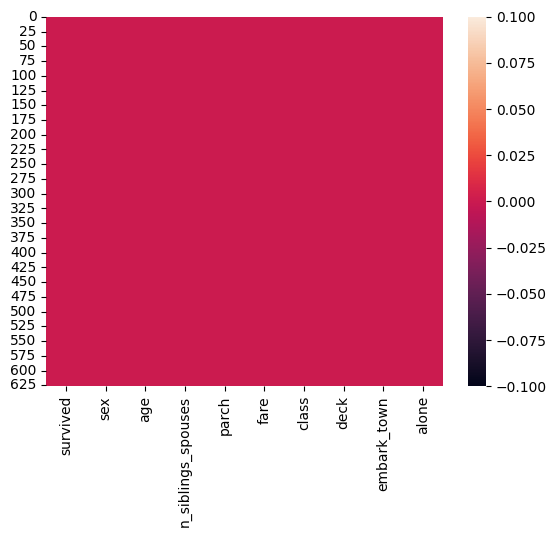

In [40]:
#Retrieve and print an image representation of the missing values
missing_values = df_train.isna()
plt.figure()
sns.heatmap(missing_values)
plt.show()


In [9]:
#Percentage of missing values by columns
(missing_values.sum(axis= 0)/df_train.shape[0]).round(1).astype(str) +"%"

survived              0.0%
sex                   0.0%
age                   0.0%
n_siblings_spouses    0.0%
parch                 0.0%
fare                  0.0%
class                 0.0%
deck                  0.0%
embark_town           0.0%
alone                 0.0%
dtype: object

In [10]:
#Retrieve the features and labeled datasets.
X_train = df_train.drop("survived", axis= 1) #Training dataset features (Dataframe)
X_test  = df_test.drop("survived", axis= 1) #Testing dataset features (Dataframe)

y_train = df_train['survived'] #Training dataset labeled (Series)
y_test  = df_test['survived'] #Testing dataset labeled (Series)

print(X_train.head())
print()
print(y_train.head())

      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


In [11]:
#Analysis the labeled distribution.
print(y_train.value_counts())
print(y_test.value_counts())

survived
0    384
1    243
Name: count, dtype: int64
survived
0    165
1     99
Name: count, dtype: int64


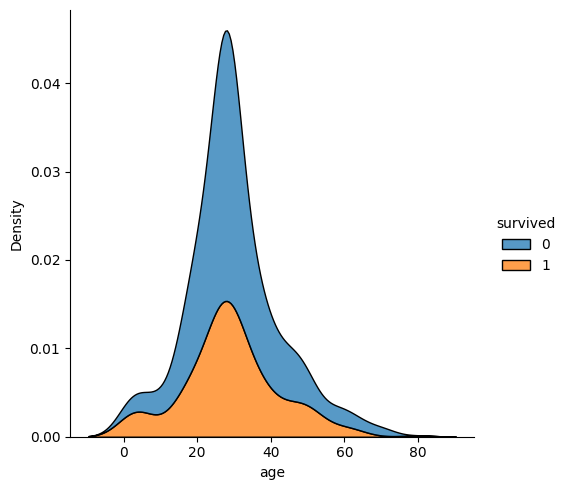

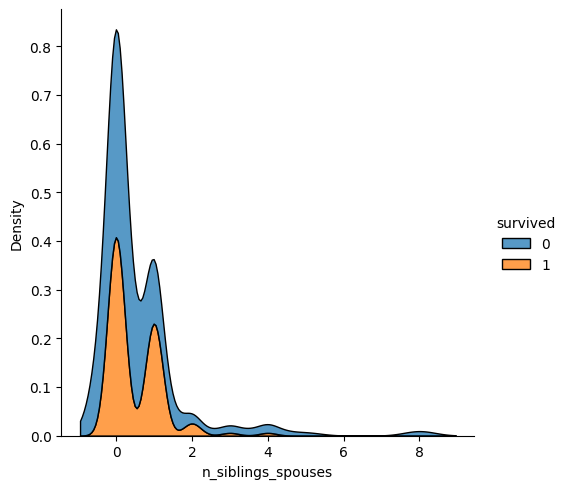

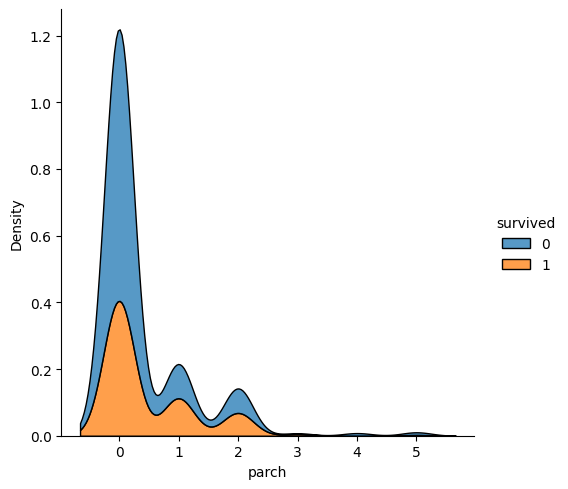

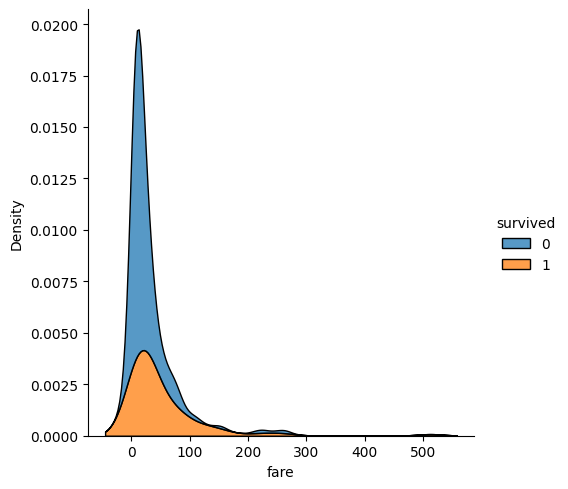

In [13]:
#Plot histogram for numerical features.
for col in X_train.select_dtypes(exclude=[object]):
  sns.displot(data=df_train, x=col, hue="survived", multiple="stack", kind="kde")

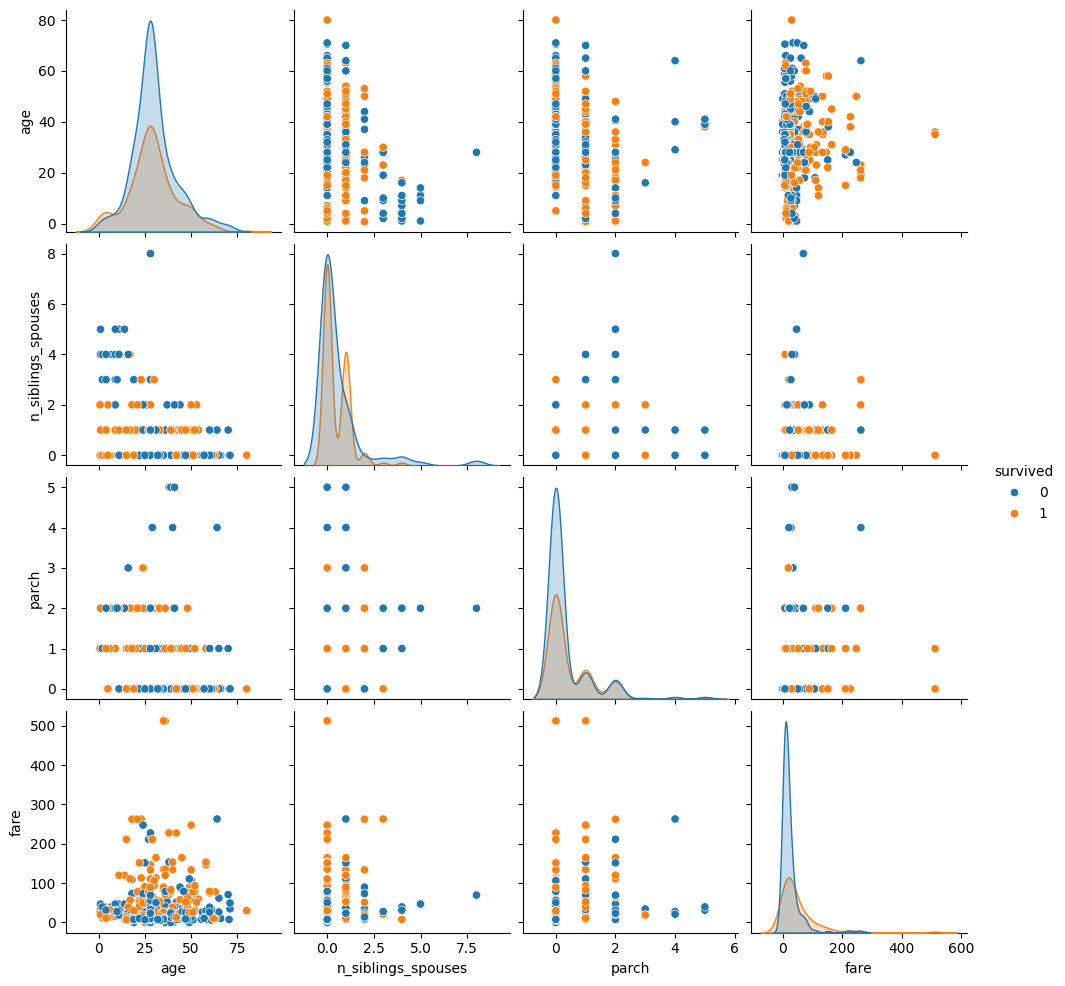

In [14]:
#Distribution between the various numerical features filter by the target.
numerical_col = ["survived"]
for col in X_train.columns:
  if df_train[col].dtypes != "object":
    numerical_col.append(col)

#Plot the distribution
sns.pairplot(df_train[numerical_col], hue="survived", diag_kind='kde')


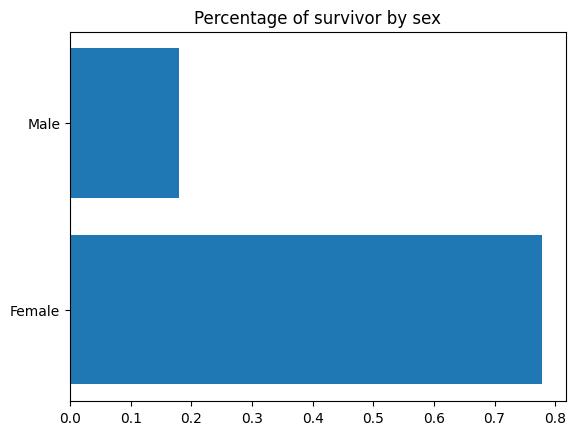

In [15]:
#Plot the survived by sex.
plt.figure()
plt.barh(["Female", "Male"], df_train.groupby("sex")["survived"].mean())
plt.title("Percentage of survivor by sex")
plt.show()

##**Preprocessing**

In [16]:
# Classify data by type.
labeled_data = ['survived']
numerical_data = ["age", "fare",]
categorical_data = ["sex", "n_siblings_spouses", "parch",
                    "class", "deck", "embark_town", "alone",]

In [17]:
features_columns = list()

for features_name in categorical_data:
  vocabulary = df_train[features_name].unique() #get a list of the various values of the feature
  features_columns.append(fc.categorical_column_with_vocabulary_list(features_name, vocabulary_list= vocabulary))

for features_name in numerical_data:
  features_columns.append(fc.numeric_column(features_name, dtype=tf.float32))

print(features_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [42]:
def preprocessing(X: pd.DataFrame) -> dict:
  #Copy of the features to encode and scale.
  X_res = dict()

  #Encode categorical features.
  for feature_name in categorical_data:
    vocab = np.array(X[feature_name].unique())

    #Features with string values.
    if vocab.dtype == "object":
      layer = layers.StringLookup(
          vocabulary= vocab, output_mode="one_hot",
      )
      X_res[feature_name] = layer(X[feature_name])

    #Features with integer values.
    else:
      layer = layers.IntegerLookup(
          vocabulary= vocab, output_mode="one_hot",
      )
      X_res[feature_name] = layer(X[feature_name])

  # Scale numerical features.
  for feature_name in numerical_data:
    mean = X[feature_name].mean()
    var = X[feature_name].var()

    layer = layers.Normalization(
        axis=None, mean= mean, variance= var,
        )
    X_res[feature_name] = layer(X[feature_name])

  return X_res


In [19]:
#Test the preprocessing function
df_res = preprocessing(df_train)
df_res

{'sex': <tf.Tensor: shape=(627, 3), dtype=float32, numpy=
 array([[0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.]], dtype=float32)>,
 'n_siblings_spouses': <tf.Tensor: shape=(627, 8), dtype=float32, numpy=
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)>,
 'parch': <tf.Tensor: shape=(627, 7), dtype=float32, numpy=
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)>,
 'class': <tf.Tensor: shape=(627, 4), dtype=float32, numpy=
 array([[0., 1., 0., 0.],
        [0., 0., 1., 0.],
    

In [41]:
def simple_preprocessing(X: pd.DataFrame) -> dict:
  #DataFrame to stock the encoded and scaled version.
  X_res = pd.DataFrame()

  #Dict for encoding values
  mapping = dict()

  #Encode categorical features.
  for feature_name in categorical_data:
    values = X[feature_name].unique()

    for i, val in enumerate(values):
      mapping[val] = i

    X_res[feature_name] = X[feature_name].map(mapping)

  # Scale numerical features.
  for feature_name in numerical_data:
    mean = X[feature_name].mean()
    var = X[feature_name].var()

    layer = layers.Normalization(
        axis=None, mean= mean, variance= var,
        )
    X_res[feature_name] = layer(X[feature_name])

  return X_res

In [21]:
#Test the simple preprocessing function
df_res = simple_preprocessing(df_train)
df_res.head()

,sex,n_siblings_spouses,parch,class,deck,embark_town,alone,age,fare
0,0,0,0,0,0,0,0,-0.609928,-0.497006
1,1,0,0,1,1,1,0,0.668863,0.675814
2,1,1,0,0,0,0,1,-0.290230,-0.484643
3,1,0,0,1,1,0,0,0.429090,0.342772
4,0,1,0,0,0,2,1,-0.130381,-0.474875


In [22]:
#The DataFrame categorical data encoding
for col in categorical_data:
  print(f"{col}: {df_res[col].unique()}")

sex: [0 1]
n_siblings_spouses: [0 1 2 3 4 5 6]
parch: [0 1 2 3 4 5]
class: [0 1 2]
deck: [0 1 2 3 4 5 6 7]
embark_town: [0 1 2 3]
alone: [0 1]


In [43]:
#Encode and scale the actual datasets
X_train = simple_preprocessing(X_train)
X_test  = simple_preprocessing(X_test)

X_test.head()

,sex,n_siblings_spouses,parch,class,deck,embark_town,alone,age,fare
0,0,0,0,0,0,0,0,0.443510,-0.542528
1,0,0,0,1,1,0,0,1.785552,0.710221
2,1,0,0,1,2,0,0,2.068087,-0.013550
3,1,0,0,2,0,0,0,1.856185,-0.315210
4,0,0,0,2,3,0,0,0.372877,-0.400990


##**Model**

In [24]:
# Create multiple inputs/single output linear model
linear_regression_model = keras.Sequential(
    [
        layers.Input(shape= X_train.shape[-1],),
        layers.Dense(units=1,),
    ]
)

linear_regression_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
#Configure the training procedure
linear_regression_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error'
)

In [26]:
#Train the model
history = linear_regression_model.fit(
    x= X_train,
    y= y_train,
    epochs = 100,
    verbose= 0, #Suppress logging.
    validation_split= 0.2, #Optimise the hyperparameters with 20% of the training dataset.

)

In [1]:
#Add epoches
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


NameError: name 'pd' is not defined

In [2]:
# Define loss function
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Survived Mean Squared Error')
  plt.legend()
  plt.grid(True)


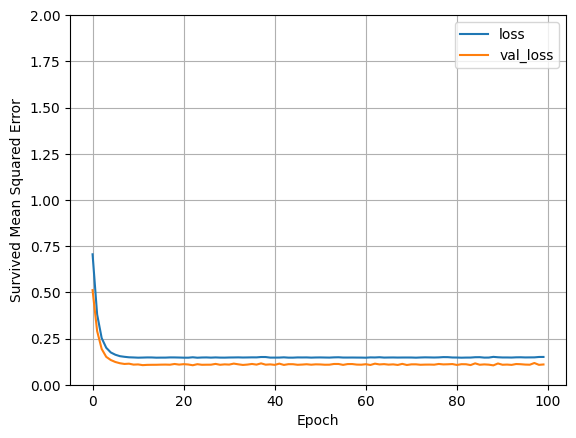

In [29]:
plot_loss(history)

Slight better result on the validation dataset.

In [30]:
# Create multiple inputs/single output deep neural network model
dnn_model = keras.Sequential(
    [
        layers.Input(shape= X_train.shape[-1]),
        layers.Dense(32, activation= "relu"),
        layers.Dense(32, activation= "relu"),
        layers.Dense(units=1),
    ]
)

dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                320       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1409 (5.50 KB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
#Configure the training procedure
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error',
)

In [32]:
#Train the model
history = dnn_model.fit(
    x= X_train,
    y= y_train,
    epochs = 100,
    verbose= 0, #Suppress logging.
    validation_split= 0.2, #Optimise the hyperparameters with 20% of the training dataset.

)

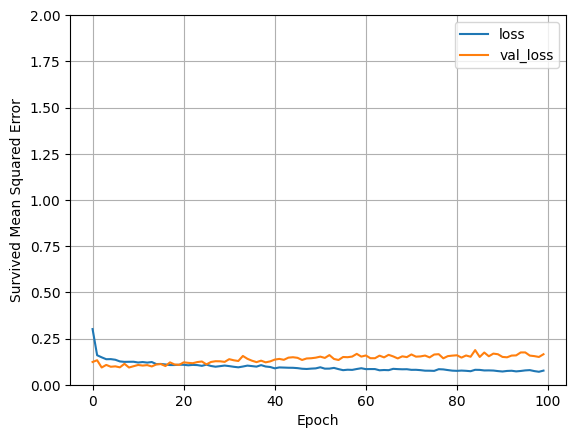

In [33]:
plot_loss(history)

A little overfitting can be seen.

##**Result**

In [38]:
#Test Dataset result
test_results = {}
test_results["titanic_lr_model"] = linear_regression_model.evaluate(
    X_test,
    y_test,
    verbose= 0,#Suppress logging.
)
test_results["titanic_dnn_model"] = dnn_model.evaluate(
    X_test,
    y_test,
    verbose= 0,#Suppress logging.
)
pd.DataFrame(test_results, index=["Mean Squared Error [Survived]"]).T

,Mean Squared Error [Survived]
titanic_lr_model,0.158486
titanic_dnn_model,0.253874


##**Conclusion**

You can see a slight better result for linear regression model without the overfitting seen in the deep neural network model.